In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('/home/ubuntu/cur/isep/result_solar_rule_v1.0.csv')
df.head()

,Municiparity_name,*CLAUSE_EXPLANATION,*CLAUSE_EXPLANATION.1,*CLAUSE_POSITIVE_PERMISSION_CONSENT,*CLAUSE_POSITIVE_PERMISSION_CONSENT.1,*CLAUSE_PENALTY,*CLAUSE_PENALTY.1,*CLAUSE_RESTRICTED_ZONE,*CLAUSE_RESTRICTED_ZONE.1,*CLAUSE_ZONE_Lv1,...,*PROCEDURE_CONSULTAION.1,*PROCEDURE_NOTICE_OPERATOR,*PROCEDURE_NOTICE_OPERATOR.1,*PROCEDURE_TIMING,*PROCEDURE_TIMING.1,*STAKEHOLDER_RESIDENTS,*STAKEHOLDER_RESIDENTS.1,*GEO_REFERENCES,*GEO_REFERENCES.1,ケース数
0,宇都宮市,5,(1.18%),54,(12.74%),11,(2.59%),6,(1.42%),12,...,(4.25%),47,(11.08%),12,(2.83%),19,(4.48%),5.0,(1.18%),424.0
1,玉川村,7,(4.24%),9,(5.45%),12,(7.27%),0,(0.00%),5,...,(0.61%),38,(23.03%),3,(1.82%),2,(1.21%),1.0,(0.61%),165.0
2,釧路市,4,(1.61%),32,(12.90%),17,(6.85%),0,(0.00%),7,...,(2.42%),31,(12.50%),7,(2.82%),8,(3.23%),2.0,(0.81%),248.0
3,松江市,13,(3.72%),39,(11.17%),9,(2.58%),3,(0.86%),1,...,(2.58%),45,(12.89%),8,(2.29%),17,(4.87%),7.0,(2.01%),349.0
4,大空町,8,(4.68%),0,(0.00%),9,(5.26%),1,(0.58%),6,...,(4.09%),33,(19.30%),6,(3.51%),0,(0.00%),1.0,(0.58%),171.0


In [16]:
# Compute Pearson residuals from Poisson GLM for count columns (non percentage)
residual_suffix = "_pearson_resid"
target_cols = [
    col for col in df.columns
    if ".1" not in col and not col.endswith(residual_suffix)
]

for col in target_cols:
    numeric_values = pd.to_numeric(df[col], errors="coerce")
    valid_mask = numeric_values.notna()
    if valid_mask.sum() == 0:
        continue
    model_df = pd.DataFrame({"y": numeric_values[valid_mask]})
    try:
        model = smf.glm("y ~ 1", data=model_df, family=sm.families.Poisson())
        res = model.fit()
        pearson_resid = res.resid_pearson
    except Exception:
        pearson_resid = pd.Series(np.nan, index=model_df.index)
    residual = pd.Series(np.nan, index=df.index)
    residual.loc[valid_mask] = pearson_resid
    residual_col = f"{col}{residual_suffix}"
    if residual_col in df.columns:
        df[residual_col] = residual
    else:
        insert_at = df.columns.get_loc(col) + 1
        df.insert(insert_at, residual_col, residual)

df.head()

,Municiparity_name,*CLAUSE_EXPLANATION,*CLAUSE_EXPLANATION_pearson_resid,*CLAUSE_EXPLANATION.1,*CLAUSE_POSITIVE_PERMISSION_CONSENT,*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid,*CLAUSE_POSITIVE_PERMISSION_CONSENT.1,*CLAUSE_PENALTY,*CLAUSE_PENALTY_pearson_resid,*CLAUSE_PENALTY.1,...,*PROCEDURE_TIMING_pearson_resid,*PROCEDURE_TIMING.1,*STAKEHOLDER_RESIDENTS,*STAKEHOLDER_RESIDENTS_pearson_resid,*STAKEHOLDER_RESIDENTS.1,*GEO_REFERENCES,*GEO_REFERENCES_pearson_resid,*GEO_REFERENCES.1,ケース数,ケース数_pearson_resid
0,宇都宮市,5,-2.063478,(1.18%),54,2.912840,(12.74%),11,-2.225703,(2.59%),...,-0.586395,(2.83%),19,0.986847,(4.48%),5.0,0.441056,(1.18%),424.0,-2.537934
1,玉川村,7,-1.491126,(4.24%),9,-4.543681,(5.45%),12,-2.008839,(7.27%),...,-2.973863,(1.82%),2,-3.379613,(1.21%),1.0,-1.532900,(0.61%),165.0,-14.364801
2,釧路市,4,-2.349653,(1.61%),32,-0.732571,(12.90%),17,-0.924523,(6.85%),...,-1.912766,(2.82%),8,-1.838509,(3.23%),2.0,-1.039411,(0.81%),248.0,-10.574723
3,松江市,13,0.225928,(3.72%),39,0.427333,(11.17%),9,-2.659429,(2.58%),...,-1.647492,(2.29%),17,0.473146,(4.87%),7.0,1.428033,(2.01%),349.0,-5.962702
4,大空町,8,-1.204950,(4.68%),0,-6.034986,(0.00%),9,-2.659429,(5.26%),...,-2.178040,(3.51%),0,-3.893314,(0.00%),1.0,-1.532900,(0.58%),171.0,-14.090819


In [24]:
# Diagnose zero proportion and overdispersion for each coding column
diagnostic_results = []

for col in target_cols:
    numeric_values = pd.to_numeric(df[col], errors="coerce")
    valid_mask = numeric_values.notna()
    if valid_mask.sum() == 0:
        continue
    
    y = numeric_values[valid_mask]
    n_zeros = (y == 0).sum()
    zero_prop = n_zeros / len(y)
    mean_val = y.mean()
    var_val = y.var()
    dispersion_ratio = var_val / mean_val if mean_val > 0 else np.nan
    
    diagnostic_results.append({
        "Column": col,
        "N": len(y),
        "N_zeros": n_zeros,
        "Zero_prop": f"{zero_prop:.2%}",
        "Mean": f"{mean_val:.2f}",
        "Variance": f"{var_val:.2f}",
        "Var/Mean": f"{dispersion_ratio:.2f}" if not np.isnan(dispersion_ratio) else "NA"
    })

diagnostic_df = pd.DataFrame(diagnostic_results)
print("診断結果: ゼロ比率と過分散の確認")
print("="*80)
print("Var/Mean > 1 の場合、過分散(overdispersion)を示唆")
print("="*80)
diagnostic_df

診断結果: ゼロ比率と過分散の確認
Var/Mean > 1 の場合、過分散(overdispersion)を示唆


,Column,N,N_zeros,Zero_prop,Mean,Variance,Var/Mean
0,*CLAUSE_EXPLANATION,19,1,5.26%,12.21,641.73,52.56
1,*CLAUSE_POSITIVE_PERMISSION_CONSENT,19,5,26.32%,36.42,6148.70,168.82
2,*CLAUSE_PENALTY,19,0,0.00%,21.26,1932.98,90.91
3,*CLAUSE_RESTRICTED_ZONE,19,11,57.89%,2.32,25.78,11.13
4,*CLAUSE_ZONE_Lv1,19,4,21.05%,8.11,289.65,35.74
5,*CLAUSE_ZONE_Lv2,19,8,42.11%,3.26,48.43,14.84
6,*CLAUSE_ENVIRONMENT,19,0,0.00%,28.21,3475.06,123.18
7,*CLAUSE_DOC_REQUIREMENTS,19,6,31.58%,6.11,177.10,29.01
8,*CLAUSE_DECOMMISSION_MAINTENANCE,19,2,10.53%,11.26,553.09,49.11
9,*CLAUSE_SIGNAGE,19,11,57.89%,3.47,59.71,17.19


In [26]:
# Compute scaled Pearson residuals adjusting for overdispersion
# Using quasi-Poisson approach: residuals scaled by sqrt(dispersion_parameter)

residual_suffix_scaled = "_scaled_resid"
gof_results = []

for col in target_cols:
    numeric_values = pd.to_numeric(df[col], errors="coerce")
    valid_mask = numeric_values.notna()
    if valid_mask.sum() == 0:
        continue
    
    y = numeric_values[valid_mask]
    n = len(y)
    
    # Fit Poisson model
    try:
        exog = np.ones((n, 1))
        pois_model = sm.GLM(y, exog, family=sm.families.Poisson())
        pois_fit = pois_model.fit()
        
        # Compute Pearson chi-squared statistic
        pearson_chi2 = pois_fit.pearson_chi2
        df_resid = n - 1  # degrees of freedom (n - number of parameters)
        
        # Estimate dispersion parameter (phi)
        dispersion = pearson_chi2 / df_resid if df_resid > 0 else 1.0
        
        # Scale residuals by sqrt(dispersion)
        scaled_resid = pois_fit.resid_pearson / np.sqrt(dispersion)
        
        # Goodness-of-fit test
        # Under H0 (Poisson fits well), Pearson chi2 ~ Chi-squared(df_resid)
        from scipy.stats import chi2
        gof_pval = 1 - chi2.cdf(pearson_chi2, df_resid) if df_resid > 0 else np.nan
        
        aic_pois = pois_fit.aic
        
    except Exception as e:
        scaled_resid = pd.Series(np.nan, index=y.index)
        dispersion = gof_pval = aic_pois = np.nan
    
    # Store scaled residuals
    residual = pd.Series(np.nan, index=df.index)
    residual.loc[valid_mask] = scaled_resid
    residual_col = f"{col}{residual_suffix_scaled}"
    
    if residual_col in df.columns:
        df[residual_col] = residual
    else:
        insert_at = df.columns.get_loc(col) + 1
        # Insert after existing Poisson residual if it exists
        if f"{col}{residual_suffix}" in df.columns:
            insert_at = df.columns.get_loc(f"{col}{residual_suffix}") + 1
        df.insert(insert_at, residual_col, residual)
    
    # Goodness-of-fit results
    gof_results.append({
        "Column": col,
        "Dispersion_φ": f"{dispersion:.2f}" if not np.isnan(dispersion) else "NA",
        "GoF_p_value": f"{gof_pval:.4f}" if not np.isnan(gof_pval) else "NA",
        "Overdispersed": "Yes" if (not np.isnan(dispersion) and dispersion > 1.5) else "No",
        "Poisson_OK": "Yes" if (not np.isnan(gof_pval) and gof_pval > 0.05) else "No"
    })

gof_df = pd.DataFrame(gof_results)
print("過分散調整済み残差の計算: Quasi-Poisson アプローチ")
print("="*80)
print("Dispersion φ > 1.5 なら過分散あり")
print("GoF p < 0.05 ならポアソン分布が適合していない")
print("Scaled residual = Pearson residual / √φ")
print("="*80)
gof_df

過分散調整済み残差の計算: Quasi-Poisson アプローチ
Dispersion φ > 1.5 なら過分散あり
GoF p < 0.05 ならポアソン分布が適合していない
Scaled residual = Pearson residual / √φ


,Column,Dispersion_φ,GoF_p_value,Overdispersed,Poisson_OK
0,*CLAUSE_EXPLANATION,52.56,0.0000,Yes,No
1,*CLAUSE_POSITIVE_PERMISSION_CONSENT,168.82,0.0000,Yes,No
2,*CLAUSE_PENALTY,90.91,0.0000,Yes,No
3,*CLAUSE_RESTRICTED_ZONE,11.13,0.0000,Yes,No
4,*CLAUSE_ZONE_Lv1,35.74,0.0000,Yes,No
5,*CLAUSE_ZONE_Lv2,14.84,0.0000,Yes,No
6,*CLAUSE_ENVIRONMENT,123.18,0.0000,Yes,No
7,*CLAUSE_DOC_REQUIREMENTS,29.01,0.0000,Yes,No
8,*CLAUSE_DECOMMISSION_MAINTENANCE,49.11,0.0000,Yes,No
9,*CLAUSE_SIGNAGE,17.19,0.0000,Yes,No


In [7]:
df.to_csv("/home/ubuntu/cur/isep/result_solar_rule_v1.1.csv")

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

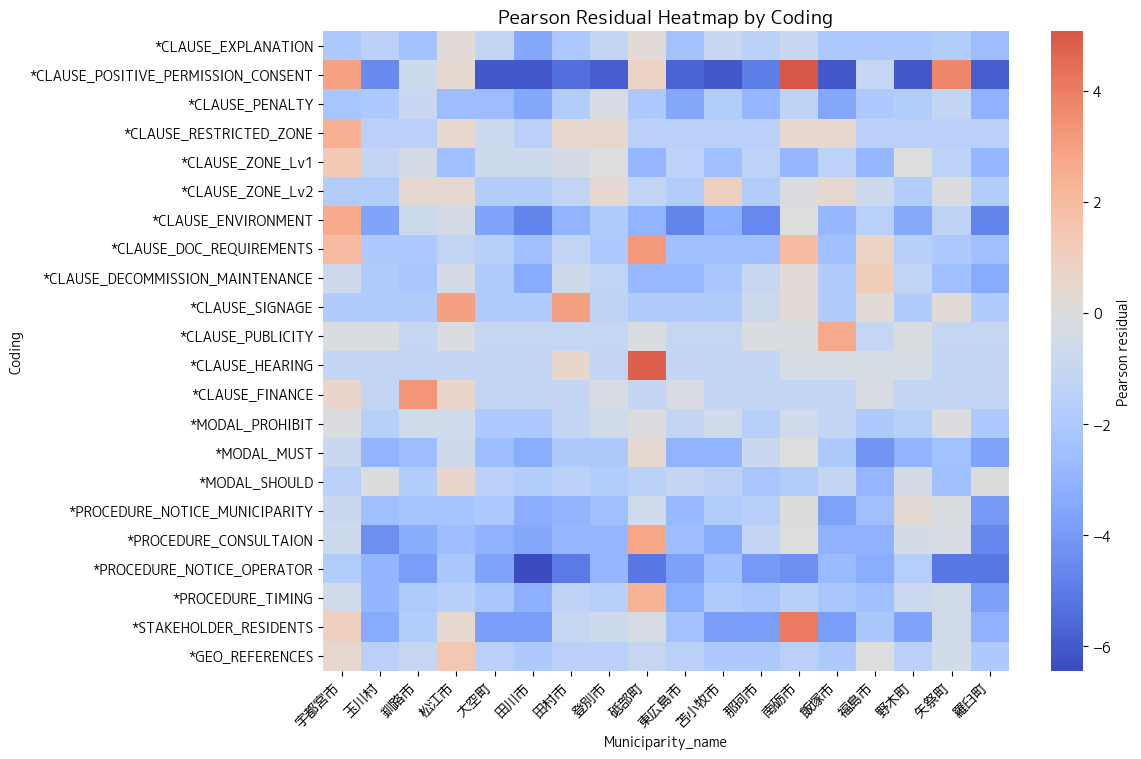

In [27]:
# Ensure Matplotlib can render Japanese labels if possible
japanese_fonts = [
    "M+ 1c"
]
available_fonts = {font.name for font in fm.fontManager.ttflist}
for font in japanese_fonts:
    if font in available_fonts:
        plt.rcParams["font.family"] = font
        break
else:
    plt.rcParams["font.family"] = plt.rcParams.get("font.family", ["sans-serif"])
    print("Warning: No Japanese font found; text may not render correctly.")
residual_cols = [
    col
    for col in df.columns
    if col.endswith(residual_suffix) and col[: -len(residual_suffix)] != "ケース数"
 ]
if not residual_cols:
    raise ValueError("No columns ending with the Pearson residual suffix were found.")
filtered_df = df.drop(index=[18, 19], errors="ignore")
if filtered_df.empty:
    raise ValueError("All rows were excluded; adjust the exclusion list.")
if "Municiparity_name" not in filtered_df.columns:
    raise KeyError("'Municiparity_name' column is required for labeling the heatmap axis.")
municiparity_labels = filtered_df["Municiparity_name"].fillna("(不明)").astype(str)
heatmap_df = filtered_df[residual_cols].copy()
heatmap_data = heatmap_df.T
heatmap_data.columns = municiparity_labels
heatmap_data.index = [col.replace(residual_suffix, "") for col in residual_cols]
n_records = heatmap_data.shape[1]
n_codings = heatmap_data.shape[0]
fig_width = min(36, max(12, n_records * 0.55))
fig_height = min(24, max(6, n_codings * 0.35))
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    cbar_kws={"label": "Pearson residual"},
    mask=heatmap_data.isna(),
)
plt.title("Pearson Residual Heatmap by Coding", fontsize=14)
plt.xlabel("Municiparity_name")
plt.ylabel("Coding")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

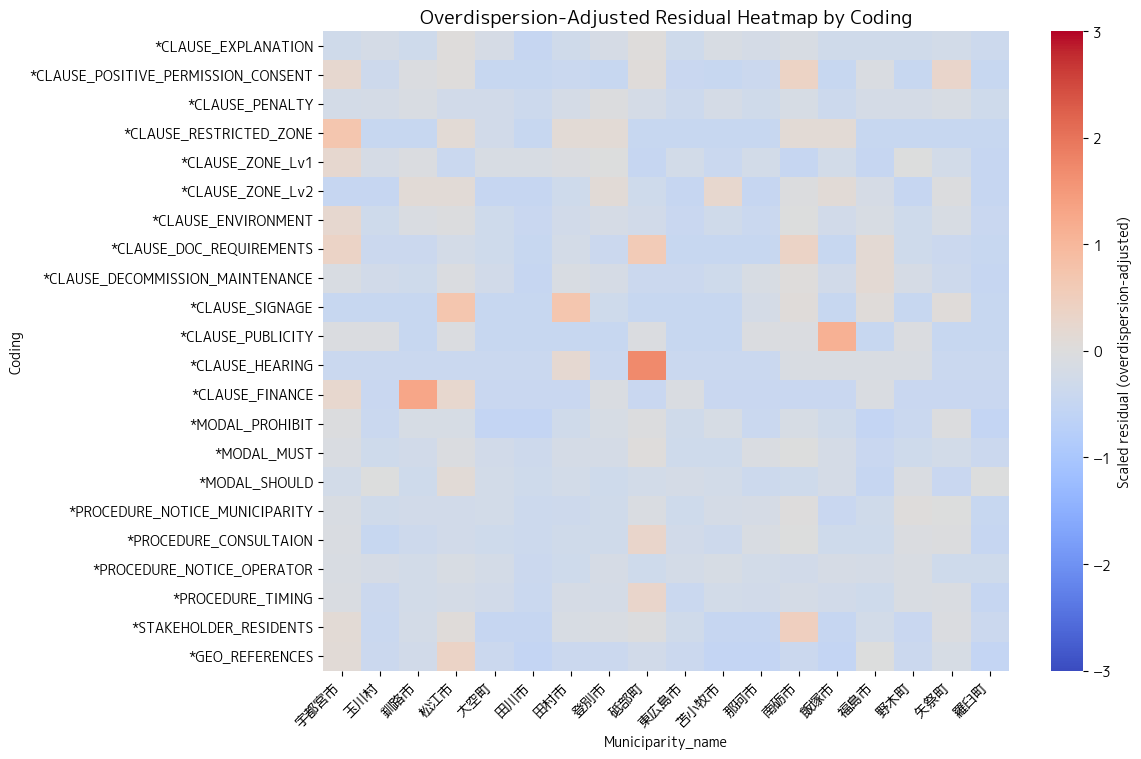

In [28]:
# Heatmap with SCALED residuals (overdispersion-adjusted)
japanese_fonts = ["M+ 1c"]
available_fonts = {font.name for font in fm.fontManager.ttflist}
for font in japanese_fonts:
    if font in available_fonts:
        plt.rcParams["font.family"] = font
        break
else:
    plt.rcParams["font.family"] = plt.rcParams.get("font.family", ["sans-serif"])
    print("Warning: No Japanese font found; text may not render correctly.")

# Use SCALED residuals instead of raw Pearson residuals
residual_cols_scaled = [
    col
    for col in df.columns
    if col.endswith(residual_suffix_scaled) and col[: -len(residual_suffix_scaled)] != "ケース数"
]

if not residual_cols_scaled:
    raise ValueError("No scaled residual columns found.")

filtered_df = df.drop(index=[18, 19], errors="ignore")
if filtered_df.empty:
    raise ValueError("All rows were excluded; adjust the exclusion list.")
if "Municiparity_name" not in filtered_df.columns:
    raise KeyError("'Municiparity_name' column is required for labeling the heatmap axis.")

municiparity_labels = filtered_df["Municiparity_name"].fillna("(不明)").astype(str)
heatmap_df = filtered_df[residual_cols_scaled].copy()
heatmap_data = heatmap_df.T
heatmap_data.columns = municiparity_labels
heatmap_data.index = [col.replace(residual_suffix_scaled, "") for col in residual_cols_scaled]

n_records = heatmap_data.shape[1]
n_codings = heatmap_data.shape[0]
fig_width = min(36, max(12, n_records * 0.55))
fig_height = min(24, max(6, n_codings * 0.35))

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    vmin=-3,  # Set range to ±3 for standardized residuals
    vmax=3,
    cbar_kws={"label": "Scaled residual (overdispersion-adjusted)"},
    mask=heatmap_data.isna(),
)
plt.title("Overdispersion-Adjusted Residual Heatmap by Coding", fontsize=14)
plt.xlabel("Municiparity_name")
plt.ylabel("Coding")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

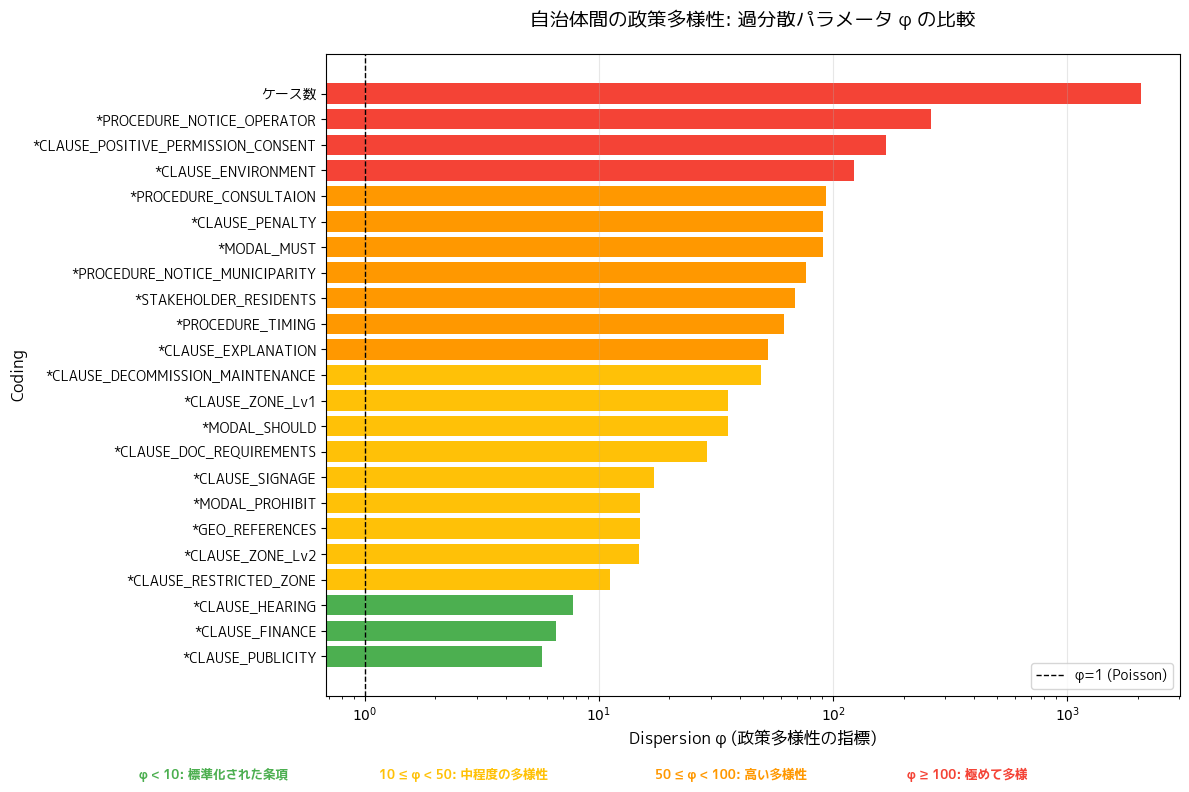

In [29]:
# Visualization 1: Dispersion parameter (φ) as a measure of policy diversity
fig, ax = plt.subplots(figsize=(12, 8))

# Extract dispersion values
gof_df_numeric = gof_df.copy()
gof_df_numeric["Dispersion_value"] = gof_df_numeric["Dispersion_φ"].str.replace("NA", "nan").astype(float)
gof_df_numeric = gof_df_numeric.dropna(subset=["Dispersion_value"])
gof_df_numeric = gof_df_numeric.sort_values("Dispersion_value")

# Color code by severity
colors = []
for val in gof_df_numeric["Dispersion_value"]:
    if val < 10:
        colors.append("#4CAF50")  # Green: low diversity
    elif val < 50:
        colors.append("#FFC107")  # Yellow: moderate
    elif val < 100:
        colors.append("#FF9800")  # Orange: high
    else:
        colors.append("#F44336")  # Red: very high

bars = ax.barh(gof_df_numeric["Column"], gof_df_numeric["Dispersion_value"], color=colors)
ax.set_xlabel("Dispersion φ (政策多様性の指標)", fontsize=12)
ax.set_ylabel("Coding", fontsize=12)
ax.set_title("自治体間の政策多様性: 過分散パラメータ φ の比較", fontsize=14, pad=20)
ax.axvline(x=1, color="black", linestyle="--", linewidth=1, label="φ=1 (Poisson)")
ax.set_xscale("log")
ax.grid(axis="x", alpha=0.3)
ax.legend()

# Add text annotations for interpretation
fig.text(0.12, 0.02, "φ < 10: 標準化された条項", fontsize=9, color="#4CAF50", weight="bold")
fig.text(0.32, 0.02, "10 ≤ φ < 50: 中程度の多様性", fontsize=9, color="#FFC107", weight="bold")
fig.text(0.55, 0.02, "50 ≤ φ < 100: 高い多様性", fontsize=9, color="#FF9800", weight="bold")
fig.text(0.76, 0.02, "φ ≥ 100: 極めて多様", fontsize=9, color="#F44336", weight="bold")

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()

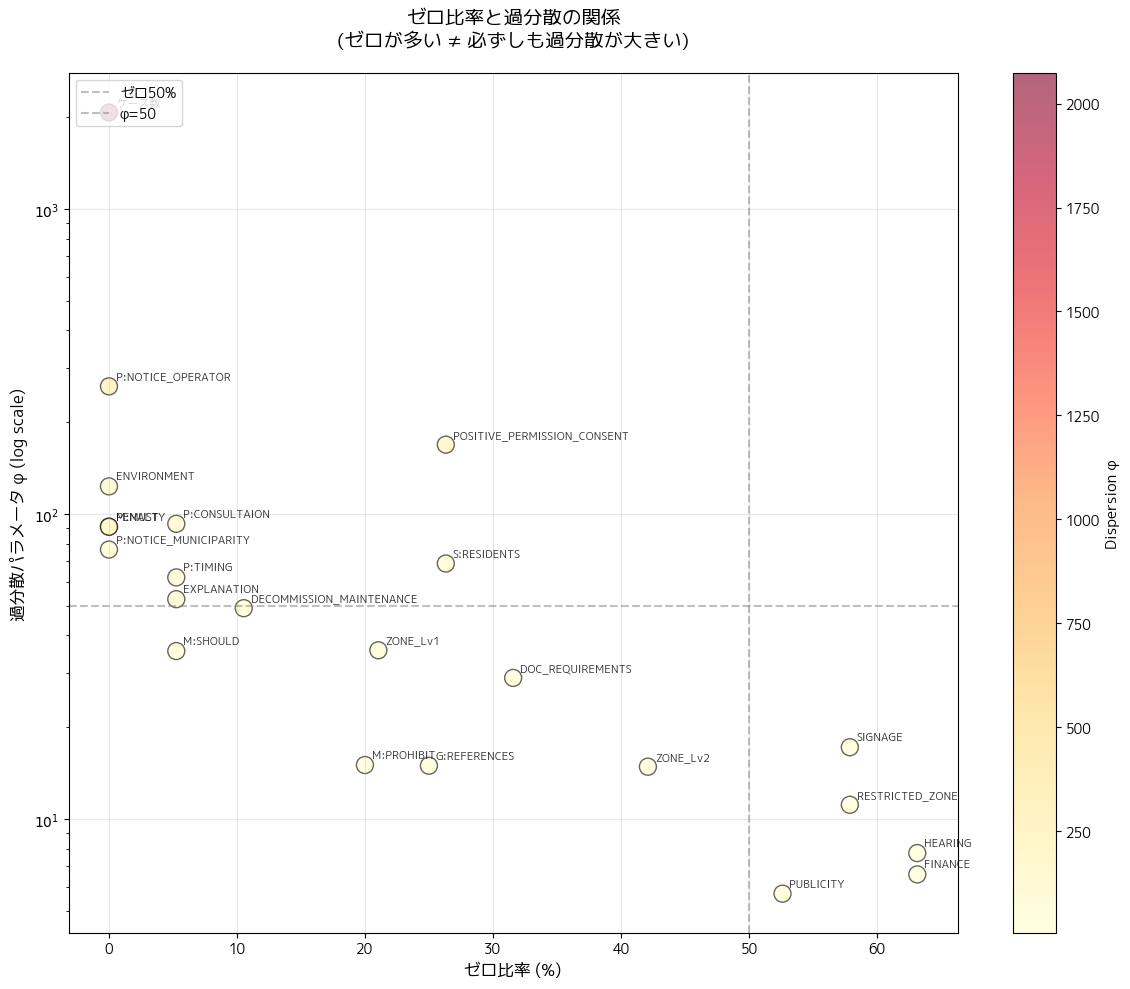

In [30]:
# Visualization 2: Zero proportion vs Overdispersion
fig, ax = plt.subplots(figsize=(12, 10))

# Merge diagnostic and gof results
combined = diagnostic_df.merge(gof_df, on="Column")
combined["Zero_prop_numeric"] = combined["Zero_prop"].str.rstrip("%").astype(float)
combined["Dispersion_numeric"] = combined["Dispersion_φ"].str.replace("NA", "nan").astype(float)
combined = combined.dropna(subset=["Dispersion_numeric"])

# Scatter plot
scatter = ax.scatter(
    combined["Zero_prop_numeric"],
    combined["Dispersion_numeric"],
    s=150,
    alpha=0.6,
    c=combined["Dispersion_numeric"],
    cmap="YlOrRd",
    edgecolors="black",
    linewidth=1
)

# Annotate points
for idx, row in combined.iterrows():
    coding_label = row["Column"].replace("*CLAUSE_", "").replace("*MODAL_", "M:").replace("*PROCEDURE_", "P:").replace("*STAKEHOLDER_", "S:").replace("*GEO_", "G:")
    ax.annotate(
        coding_label,
        (row["Zero_prop_numeric"], row["Dispersion_numeric"]),
        fontsize=8,
        alpha=0.8,
        xytext=(5, 5),
        textcoords="offset points"
    )

ax.set_xlabel("ゼロ比率 (%)", fontsize=12)
ax.set_ylabel("過分散パラメータ φ (log scale)", fontsize=12)
ax.set_yscale("log")
ax.set_title("ゼロ比率と過分散の関係\n(ゼロが多い ≠ 必ずしも過分散が大きい)", fontsize=14, pad=20)
ax.grid(alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Dispersion φ", fontsize=11)

# Add interpretation zones
ax.axvline(x=50, color="gray", linestyle="--", alpha=0.5, label="ゼロ50%")
ax.axhline(y=50, color="gray", linestyle="--", alpha=0.5, label="φ=50")
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

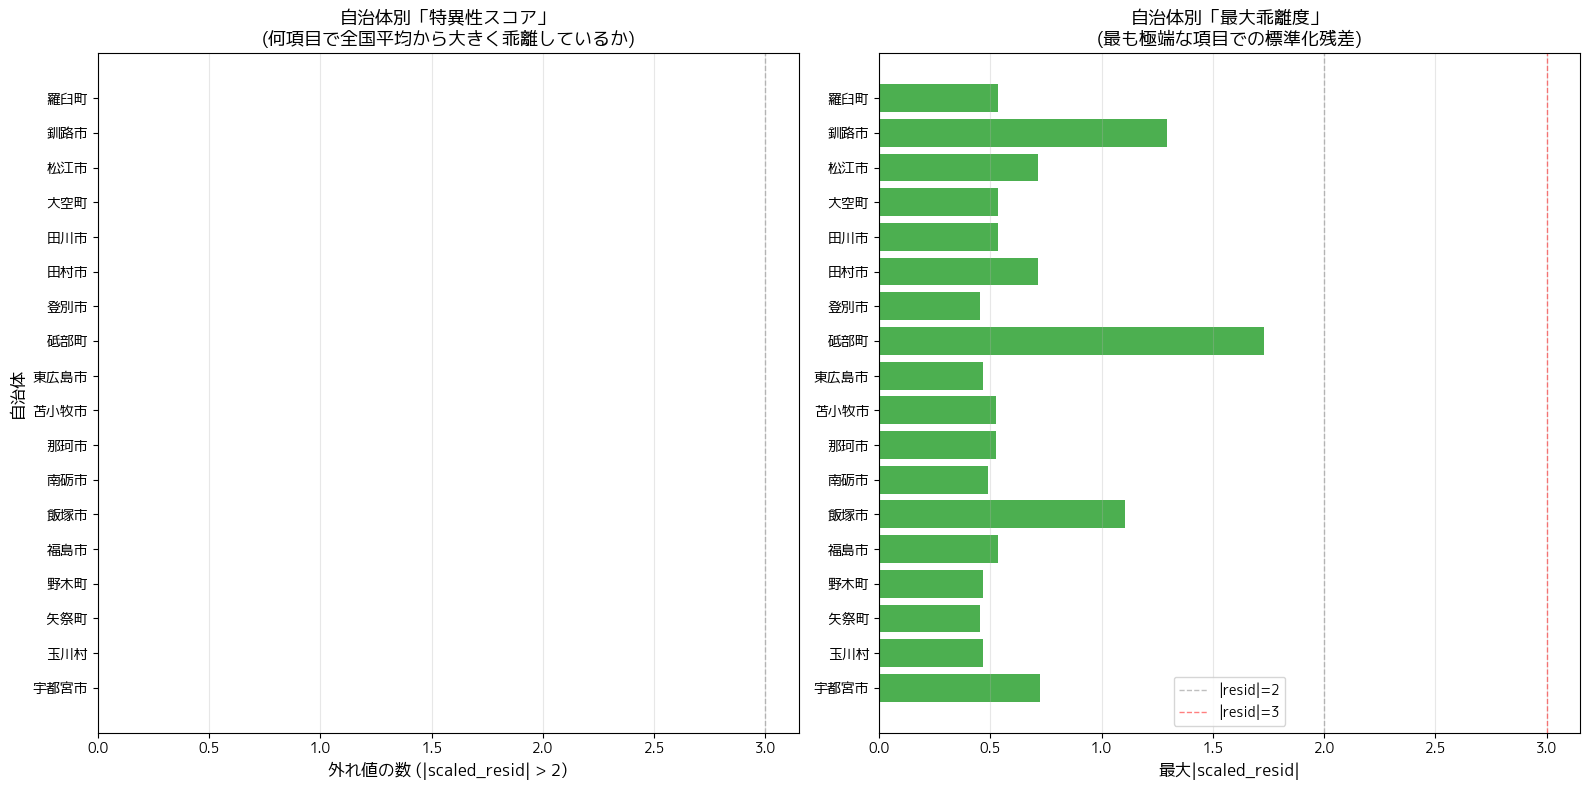


自治体別の外れ値サマリー:
Municipality  N_outliers  Max_abs_residual
        宇都宮市           0          0.725559
         玉川村           0          0.468916
         矢祭町           0          0.456065
         野木町           0          0.468916
         福島市           0          0.533366
         飯塚市           0          1.107564
         南砺市           0          0.490529
         那珂市           0          0.524106
        苫小牧市           0          0.524106
        東広島市           0          0.468916
         砥部町           0          1.731446
         登別市           0          0.451720
         田村市           0          0.715189
         田川市           0          0.533366
         大空町           0          0.533366
         松江市           0          0.715189
         釧路市           0          1.295845
         羅臼町           0          0.533366


In [31]:
# Visualization 3: Municipality "outlier profile" - which municipality is extreme where?
# Count how many codings each municipality has |scaled_resid| > 2

filtered_df = df.drop(index=[18, 19], errors="ignore")
residual_cols_scaled = [col for col in df.columns if col.endswith(residual_suffix_scaled) and col[:-len(residual_suffix_scaled)] != "ケース数"]

outlier_counts = []
for idx in filtered_df.index:
    municipality = filtered_df.loc[idx, "Municiparity_name"]
    row_data = filtered_df.loc[idx, residual_cols_scaled]
    
    n_outliers = (row_data.abs() > 2).sum()
    max_abs_resid = row_data.abs().max()
    
    outlier_counts.append({
        "Municipality": municipality,
        "N_outliers": n_outliers,
        "Max_abs_residual": max_abs_resid
    })

outlier_df = pd.DataFrame(outlier_counts).sort_values("N_outliers", ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Left: Bar chart of outlier counts
colors_outliers = ["#F44336" if x >= 5 else "#FF9800" if x >= 3 else "#4CAF50" for x in outlier_df["N_outliers"]]
ax1.barh(outlier_df["Municipality"], outlier_df["N_outliers"], color=colors_outliers)
ax1.set_xlabel("外れ値の数 (|scaled_resid| > 2)", fontsize=12)
ax1.set_ylabel("自治体", fontsize=12)
ax1.set_title("自治体別「特異性スコア」\n(何項目で全国平均から大きく乖離しているか)", fontsize=13)
ax1.axvline(x=3, color="gray", linestyle="--", alpha=0.5, linewidth=1)
ax1.grid(axis="x", alpha=0.3)

# Right: Max absolute residual
colors_max = ["#F44336" if x >= 3 else "#FF9800" if x >= 2 else "#4CAF50" for x in outlier_df["Max_abs_residual"]]
ax2.barh(outlier_df["Municipality"], outlier_df["Max_abs_residual"], color=colors_max)
ax2.set_xlabel("最大|scaled_resid|", fontsize=12)
ax2.set_title("自治体別「最大乖離度」\n(最も極端な項目での標準化残差)", fontsize=13)
ax2.axvline(x=2, color="gray", linestyle="--", alpha=0.5, linewidth=1, label="|resid|=2")
ax2.axvline(x=3, color="red", linestyle="--", alpha=0.5, linewidth=1, label="|resid|=3")
ax2.grid(axis="x", alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("\n自治体別の外れ値サマリー:")
print(outlier_df.to_string(index=False))

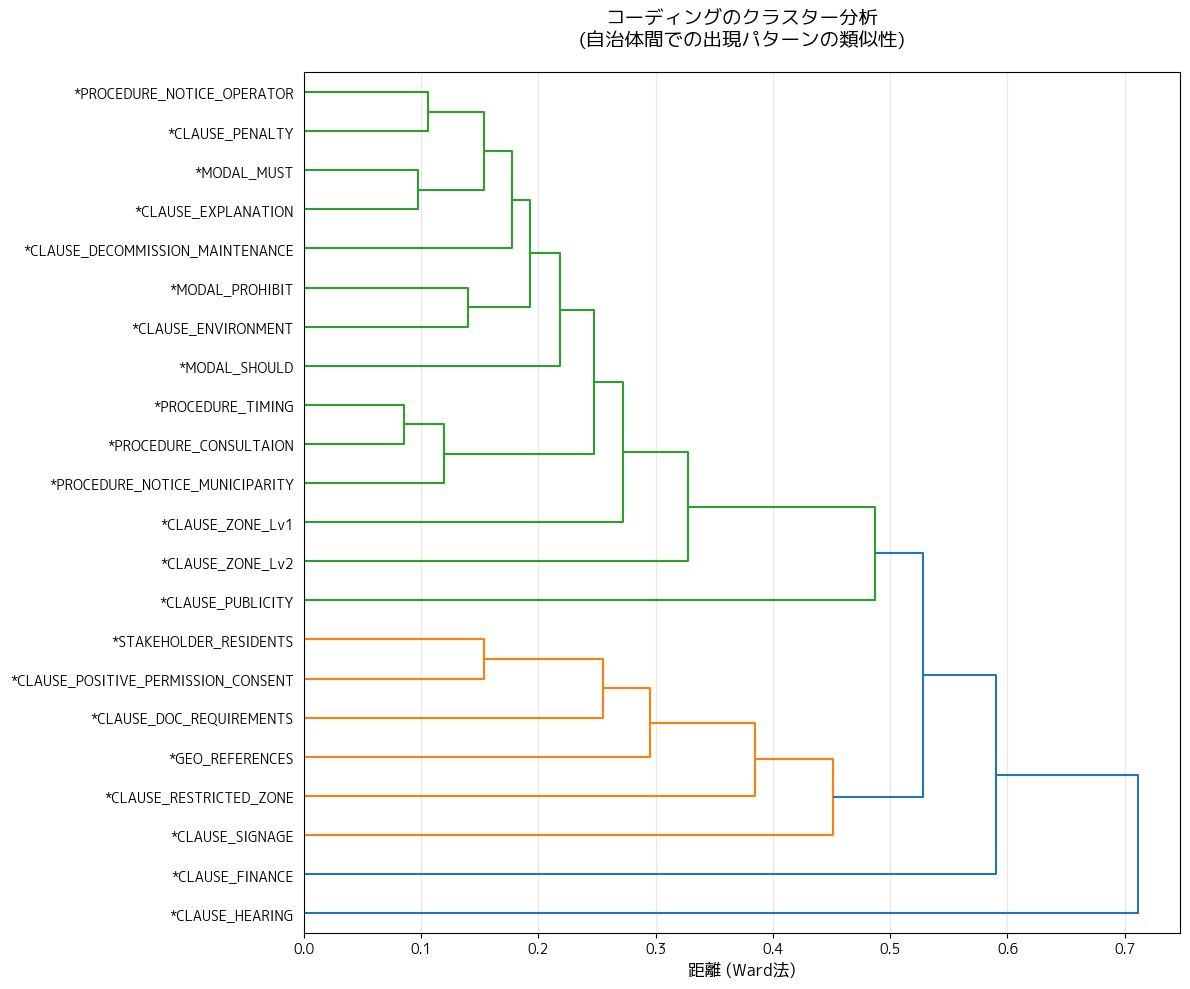


解釈:
- 近い位置にあるコーディング = 似た自治体で一緒に出現する
- 例: 罰則系と許可系が近ければ、規制的な自治体で両方採用されている


In [34]:
# Visualization 4: Clustering of codings based on occurrence patterns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Get raw count data (not residuals) for clustering
filtered_df = df.drop(index=[18, 19], errors="ignore")
count_cols = [col for col in target_cols if col != "ケース数" and col != "Municiparity_name"]

# Build matrix: rows = codings, columns = municipalities
count_matrix = filtered_df[count_cols].T

# Convert to numeric, coercing any non-numeric to NaN
count_matrix = count_matrix.apply(pd.to_numeric, errors="coerce")

# Set column names
count_matrix.columns = filtered_df["Municiparity_name"].fillna("(不明)").astype(str)

# Normalize by row (each coding's pattern across municipalities)
row_sums = count_matrix.sum(axis=1)
# Avoid division by zero
count_matrix_norm = count_matrix.div(row_sums.replace(0, np.nan), axis=0).fillna(0)

# Remove rows with all zeros or NaN
count_matrix_norm = count_matrix_norm.loc[(count_matrix_norm != 0).any(axis=1)]

if count_matrix_norm.shape[0] < 2:
    print("Not enough data for clustering after filtering.")
else:
    # Hierarchical clustering
    linkage_matrix = linkage(count_matrix_norm, method="ward")

    # Plot dendrogram
    fig, ax = plt.subplots(figsize=(12, 10))
    dendrogram(
        linkage_matrix,
        labels=count_matrix_norm.index,
        orientation="right",
        ax=ax,
        color_threshold=0.7*max(linkage_matrix[:, 2])
    )
    ax.set_xlabel("距離 (Ward法)", fontsize=12)
    ax.set_title("コーディングのクラスター分析\n(自治体間での出現パターンの類似性)", fontsize=14, pad=20)
    ax.grid(axis="x", alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\n解釈:")
    print("- 近い位置にあるコーディング = 似た自治体で一緒に出現する")
    print("- 例: 罰則系と許可系が近ければ、規制的な自治体で両方採用されている")

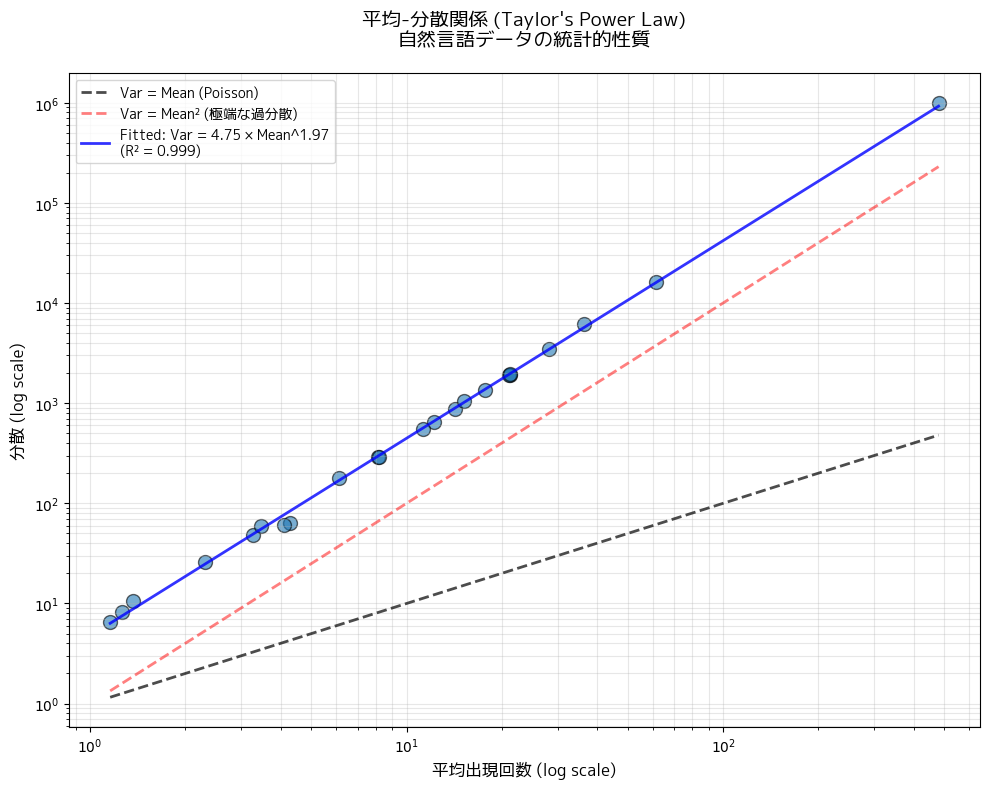


Taylor's Power Law パラメータ:
  指数 b = 1.973
  R² = 0.999

解釈:
  b ≈ 1: ポアソン分布
  1 < b < 2: 過分散あり（自然言語では典型的）
  b ≈ 2: 極端な過分散（クラスター化が強い）
  → 本データ: b = 1.973 なので、強い過分散


In [33]:
# Visualization 5: Mean-Variance relationship (Taylor's Power Law)
# Classic diagnostic for count data - shows if variance scales with mean

fig, ax = plt.subplots(figsize=(10, 8))

means = []
variances = []
labels = []

for col in target_cols:
    numeric_values = pd.to_numeric(df[col], errors="coerce")
    valid_mask = numeric_values.notna()
    if valid_mask.sum() == 0:
        continue
    
    y = numeric_values[valid_mask]
    mean_val = y.mean()
    var_val = y.var()
    
    if mean_val > 0 and var_val > 0:
        means.append(mean_val)
        variances.append(var_val)
        labels.append(col)

# Scatter plot on log-log scale
scatter = ax.scatter(means, variances, s=100, alpha=0.6, edgecolors="black", linewidth=1)

# Add reference lines
mean_range = np.array([min(means), max(means)])
ax.plot(mean_range, mean_range, 'k--', linewidth=2, label="Var = Mean (Poisson)", alpha=0.7)
ax.plot(mean_range, mean_range**2, 'r--', linewidth=2, label="Var = Mean² (極端な過分散)", alpha=0.5)

# Fit power law: Var = a * Mean^b
from scipy.stats import linregress
log_means = np.log10(means)
log_vars = np.log10(variances)
slope, intercept, r_value, p_value, std_err = linregress(log_means, log_vars)

fitted_line = 10**intercept * mean_range**slope
ax.plot(mean_range, fitted_line, 'b-', linewidth=2, 
        label=f"Fitted: Var = {10**intercept:.2f} × Mean^{slope:.2f}\n(R² = {r_value**2:.3f})", 
        alpha=0.8)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("平均出現回数 (log scale)", fontsize=12)
ax.set_ylabel("分散 (log scale)", fontsize=12)
ax.set_title("平均-分散関係 (Taylor's Power Law)\n自然言語データの統計的性質", fontsize=14, pad=20)
ax.legend(fontsize=10, loc="upper left")
ax.grid(alpha=0.3, which="both")

plt.tight_layout()
plt.show()

print(f"\nTaylor's Power Law パラメータ:")
print(f"  指数 b = {slope:.3f}")
print(f"  R² = {r_value**2:.3f}")
print(f"\n解釈:")
print(f"  b ≈ 1: ポアソン分布")
print(f"  1 < b < 2: 過分散あり（自然言語では典型的）")
print(f"  b ≈ 2: 極端な過分散（クラスター化が強い）")
print(f"  → 本データ: b = {slope:.3f} なので、{'中程度' if 1 < slope < 1.5 else '強い' if slope < 2 else '極端な'}過分散")